In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv('student_assignment.csv')

In [3]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
99,42.0,46673.04,False,5.0,38.8,10.9
100,35.0,27089.59,True,5.0,35.3,1.6
101,61.0,83082.63,True,4.0,35.6,3.7
102,39.0,61868.49,True,5.0,37.1,3.8


In [4]:
data.shape

(104, 6)

In [5]:
data.describe()

,Age,Income,Num Children,Temperature,Rating
count,103.000000,104.000000,101.000000,104.000000,104.000000
mean,52.932039,58456.756442,3.059406,38.399038,3.295192
std,66.249567,22150.934058,4.046781,2.083010,1.448426
min,18.000000,20955.370000,0.000000,35.200000,-3.200000
25%,31.500000,40065.965000,2.000000,36.700000,2.600000
50%,42.000000,58014.560000,3.000000,38.400000,3.400000
75%,53.500000,74489.015000,4.000000,39.925000,4.100000
max,511.000000,99072.180000,40.000000,41.900000,10.900000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [7]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [9]:
data.duplicated().sum()

3

In [10]:
data=data.drop_duplicates()

In [12]:
data.shape

(101, 6)

In [13]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [15]:
data['Age'].mean()

53.31

In [16]:
data['Age'].median()

42.0

<AxesSubplot:>

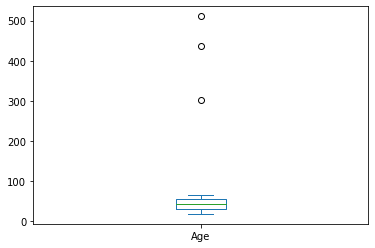

In [17]:
data['Age'].plot(kind='box')

In [18]:
data['Age'] = data['Age'].fillna(data['Age'].median())

C:\Users\devad\AppData\Local\Temp/ipykernel_9624/32821270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].fillna(data['Age'].median())


In [19]:
data['Age'].isna().sum()

0

In [20]:
#Detecting outlier with z-score
outliers=[]
def detect_outlier(insurance):
    
    threshold=3
    mean_1 = np.mean(insurance)
    std_1 = np.std(insurance)
    
    
    for y in insurance:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [21]:
data['Age'] = data['Age'].astype('int')

C:\Users\devad\AppData\Local\Temp/ipykernel_9624/3542571116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].astype('int')


In [22]:
data.select_dtypes(include=np.number).apply(detect_outlier)

,Age,Income,Num Children,Temperature,Rating
0,511.0,511.0,511.0,511.0,511.0
1,301.0,301.0,301.0,301.0,301.0
2,438.0,438.0,438.0,438.0,438.0
3,40.0,40.0,40.0,40.0,40.0
4,-3.2,-3.2,-3.2,-3.2,-3.2
5,10.9,10.9,10.9,10.9,10.9


In [23]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Age
Outliers =  7     511
19    301
47    438
Name: Age, dtype: int32
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  82    40.0
Name: Num Children, dtype: float64
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)


In [24]:
#Removed the age outlier
data = data[~(data['Age']>100)]

In [25]:
data['Age'].mean()

42.07142857142857

In [26]:
data['Age'].median()

41.5

<AxesSubplot:>

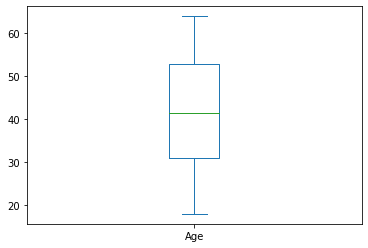

In [27]:
data['Age'].plot(kind = 'box')

In [28]:
data.shape

(98, 6)

In [29]:
data[['Income','Is Student','Num Children','Temperature','Rating']].isna().sum()

Income          0
Is Student      0
Num Children    2
Temperature     0
Rating          0
dtype: int64

In [32]:
data.dropna(subset=['Income','Is Student','Num Children','Temperature','Rating'],inplace=True)

In [33]:
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    0
Temperature     0
Rating          0
dtype: int64

In [34]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

Age
Outliers =  Series([], Name: Age, dtype: int32)
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  82    40.0
Name: Num Children, dtype: float64
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)


In [35]:
#Removed the age outlier
data = data[~(data['Num Children']>10)]

In [36]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

Age
Outliers =  Series([], Name: Age, dtype: int32)
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  Series([], Name: Num Children, dtype: float64)
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)


In [37]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43,45893.41,True,0.0,38.2,2.6
1,56,69663.07,True,1.0,38.7,3.2
2,42,45124.06,False,5.0,36.9,3.9
3,37,76724.60,False,2.0,41.6,2.5
4,53,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
96,48,90964.58,False,2.0,38.9,3.9
97,58,70679.33,True,4.0,41.3,4.8
98,50,97052.37,True,2.0,37.1,4.6
99,42,46673.04,False,5.0,38.8,10.9


<AxesSubplot:>

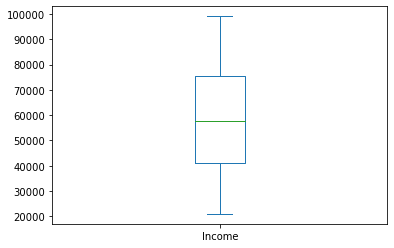

In [38]:
data['Income'].plot(kind='box')

In [39]:
data['Is Student']

0       True
1       True
2      False
3      False
4      False
       ...  
96     False
97      True
98      True
99     False
101     True
Name: Is Student, Length: 95, dtype: object

In [40]:
data['Is Student'].unique()

array(['True', 'False', 'NO', 'Yes', 'false', 'YES', 'true'], dtype=object)

In [41]:
data['Is Student'].replace({'NO':'False','false':'False'},inplace=True)
data['Is Student'].replace({'Yes':'True','YES':'True','true':'True'},inplace=True)

In [42]:
data['Is Student'].unique()

array(['True', 'False'], dtype=object)

In [43]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43,45893.41,True,0.0,38.2,2.6
1,56,69663.07,True,1.0,38.7,3.2
2,42,45124.06,False,5.0,36.9,3.9
3,37,76724.60,False,2.0,41.6,2.5
4,53,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
96,48,90964.58,False,2.0,38.9,3.9
97,58,70679.33,True,4.0,41.3,4.8
98,50,97052.37,True,2.0,37.1,4.6
99,42,46673.04,False,5.0,38.8,10.9


In [44]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Age
Outliers =  Series([], Name: Age, dtype: int32)
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  Series([], Name: Num Children, dtype: float64)
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)


In [45]:
data_num = data.select_dtypes(include = np.number)

In [46]:
data_num

,Age,Income,Num Children,Temperature,Rating
0,43,45893.41,0.0,38.2,2.6
1,56,69663.07,1.0,38.7,3.2
2,42,45124.06,5.0,36.9,3.9
3,37,76724.60,2.0,41.6,2.5
4,53,58343.03,1.0,36.5,3.3
...,...,...,...,...,...
96,48,90964.58,2.0,38.9,3.9
97,58,70679.33,4.0,41.3,4.8
98,50,97052.37,2.0,37.1,4.6
99,42,46673.04,5.0,38.8,10.9


In [47]:
scaling = MinMaxScaler()

In [48]:
# sklearn onehot
pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

,Age,Income,Num Children,Temperature,Rating
0,0.543478,0.319240,0.0,0.447761,0.411348
1,0.826087,0.623524,0.2,0.522388,0.453901
2,0.521739,0.309392,1.0,0.253731,0.503546
3,0.413043,0.713921,0.4,0.955224,0.404255
4,0.760870,0.478612,0.2,0.194030,0.460993
...,...,...,...,...,...
90,0.652174,0.896212,0.4,0.552239,0.503546
91,0.869565,0.636533,0.8,0.910448,0.567376
92,0.695652,0.974144,0.4,0.283582,0.553191
93,0.521739,0.329221,1.0,0.537313,1.000000


In [49]:
scaling = StandardScaler()
data_scale = pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

In [50]:
data_scale

,Age,Income,Num Children,Temperature,Rating
0,0.094123,-0.599508,-1.671287,-0.124031,-0.513811
1,1.104922,0.478183,-1.043729,0.117423,-0.103050
2,0.016369,-0.634389,1.466505,-0.751814,0.376170
3,-0.372400,0.798346,-0.416170,1.517860,-0.582271
4,0.871660,-0.035055,-1.043729,-0.944977,-0.034590
...,...,...,...,...,...
90,0.482892,1.443971,-0.416170,0.214005,0.376170
91,1.260429,0.524260,0.838947,1.372988,0.992311
92,0.638399,1.719985,-0.416170,-0.655232,0.855391
93,0.016369,-0.564160,1.466505,0.165714,5.168378


In [51]:
data_cat = data.select_dtypes(exclude = np.number)

In [52]:
data_cat

,Is Student
0,True
1,True
2,False
3,False
4,False
...,...
96,False
97,True
98,True
99,False


In [55]:
data_stu_cat = pd.get_dummies(data_cat['Is Student'])

In [56]:
data_scale = data_scale.reset_index().drop(columns = 'index')
data_stu_cat = data_stu_cat.reset_index().drop(columns = 'index')

In [57]:
pd.concat([data_scale, data_stu_cat], axis = 1)

,Age,Income,Num Children,Temperature,Rating,False,True
0,0.094123,-0.599508,-1.671287,-0.124031,-0.513811,0,1
1,1.104922,0.478183,-1.043729,0.117423,-0.103050,0,1
2,0.016369,-0.634389,1.466505,-0.751814,0.376170,1,0
3,-0.372400,0.798346,-0.416170,1.517860,-0.582271,1,0
4,0.871660,-0.035055,-1.043729,-0.944977,-0.034590,1,0
...,...,...,...,...,...,...,...
90,0.482892,1.443971,-0.416170,0.214005,0.376170,1,0
91,1.260429,0.524260,0.838947,1.372988,0.992311,0,1
92,0.638399,1.719985,-0.416170,-0.655232,0.855391,0,1
93,0.016369,-0.564160,1.466505,0.165714,5.168378,1,0


In [58]:
data_scale.index

RangeIndex(start=0, stop=95, step=1)

In [59]:
data_stu_cat.index

RangeIndex(start=0, stop=95, step=1)